# Import Python Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Load Dataset & DataFrame Information

In [2]:
df = pd.read_csv("data/heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.shape

(1025, 14)

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Dataframe Value Analysis

In [9]:
columns = ['age', 
           'sex', 
           'cp', 
           'trestbps', 
           'chol', 
           'fbs', 
           'restecg', 
           'thalach', 
           'exang', 
           'oldpeak', 
           'slope', 
           'ca', 
           'thal', 
           'target']

for i in range(len(columns)):
    print(df[columns[i]].value_counts())

age
58    68
57    57
54    53
59    46
52    43
56    39
51    39
62    37
60    37
44    36
64    34
41    32
63    32
61    31
67    31
55    30
65    27
42    26
43    26
53    26
45    25
66    25
46    23
48    23
50    21
47    18
49    17
35    15
70    14
39    14
38    12
68    12
71    11
40    11
69     9
34     6
37     6
29     4
76     3
77     3
74     3
Name: count, dtype: int64
sex
1    713
0    312
Name: count, dtype: int64
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64
trestbps
120    128
130    123
140    107
110     64
150     55
138     45
128     39
125     38
160     36
112     30
132     28
118     24
108     21
124     20
135     20
152     17
145     17
134     17
170     15
122     14
100     14
136     11
180     10
126     10
142      9
115      9
105      9
146      8
148      7
94       7
178      7
102      6
144      6
165      4
200      4
114      4
154      4
117      4
123      4
104      3
106      3
174      3
129      3
192   

# Exploratory Data Analysis

## Features Data Analysis

### Age Distribution

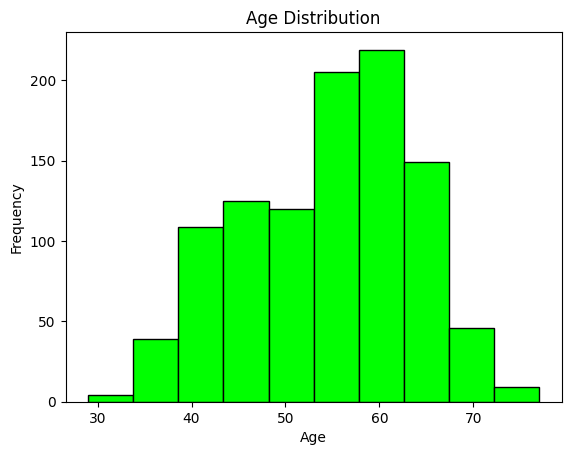

In [10]:
plt.hist(df['age'], color='lime', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Sex Distribution

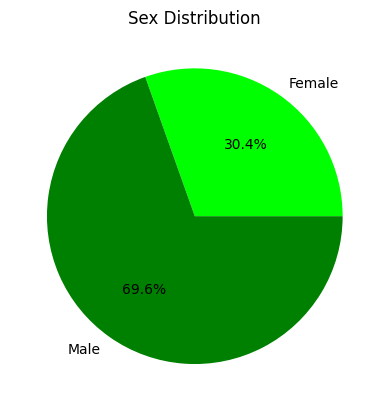

In [11]:
plt.pie(df['sex'].value_counts().sort_index(), labels=['Female', 'Male'], autopct='%1.1f%%', colors=['lime', 'green'])
plt.title('Sex Distribution')
plt.show()

### Chest Pain Type Distribution

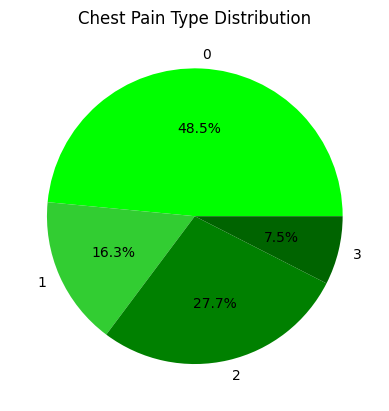

In [12]:
plt.pie(df['cp'].value_counts().sort_index(), labels=['0', '1', '2', '3'], autopct='%1.1f%%', colors=['lime', 'limegreen', 'green', 'darkgreen'])
plt.title('Chest Pain Type Distribution')
plt.show()

### Resting Blood Pressure Distribution 

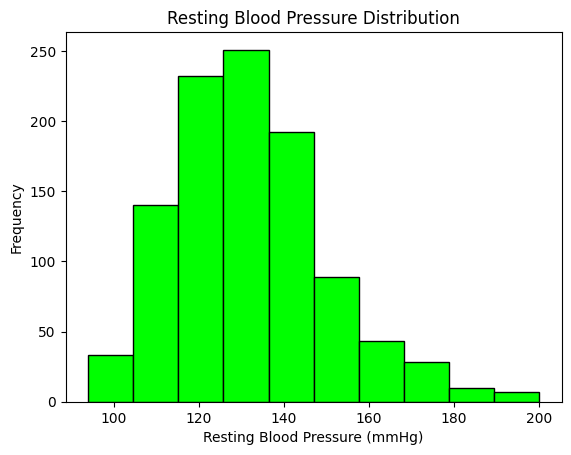

In [13]:
plt.hist(df['trestbps'], color='lime', edgecolor='black')
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure (mmHg)')
plt.ylabel('Frequency')
plt.show()

### Serum Cholestoral Distribution

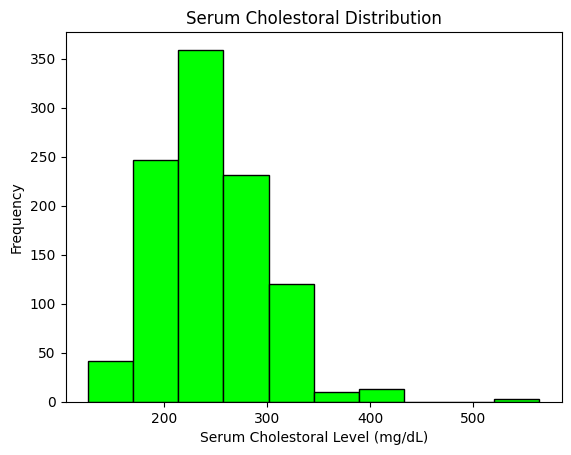

In [14]:
plt.hist(df['chol'], color='lime', edgecolor='black')
plt.title('Serum Cholestoral Distribution')
plt.xlabel('Serum Cholestoral Level (mg/dL)')
plt.ylabel('Frequency')
plt.show()

### Fasting Blood Sugar Distribution

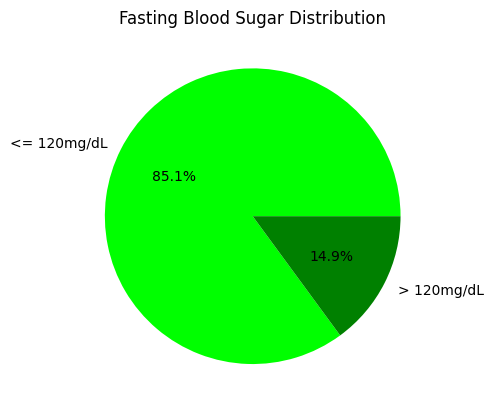

In [15]:
plt.pie(df['fbs'].value_counts().sort_index(), labels=['<= 120mg/dL', '> 120mg/dL'], autopct='%1.1f%%', colors=['lime', 'green'])
plt.title('Fasting Blood Sugar Distribution')
plt.show()

### Resting Electrocardiographic Distribution

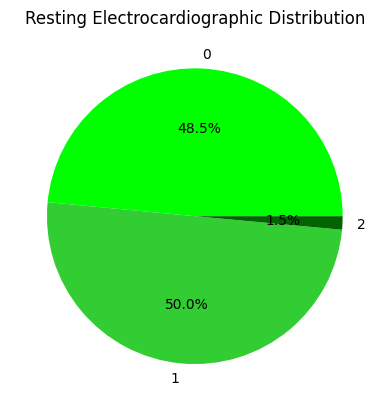

In [16]:
plt.pie(df['restecg'].value_counts().sort_index(), labels=['0', '1', '2'], autopct='%1.1f%%', colors=['lime', 'limegreen', 'darkgreen'])
plt.title('Resting Electrocardiographic Distribution')
plt.show()

### Max Heart Rate Distribution

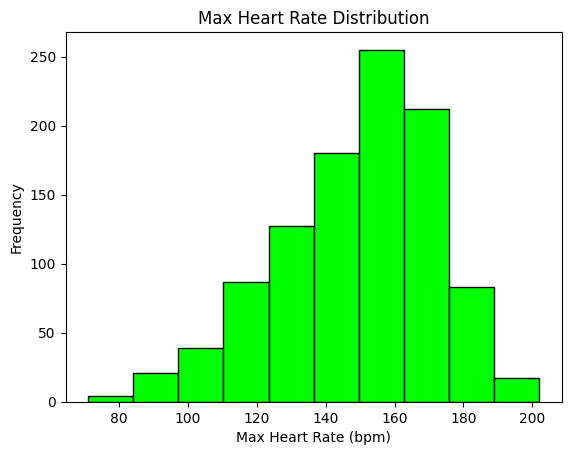

In [17]:
plt.hist(df['thalach'], color='lime', edgecolor='black')
plt.title('Max Heart Rate Distribution')
plt.xlabel('Max Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

### Exercise Induced Angina Distribution

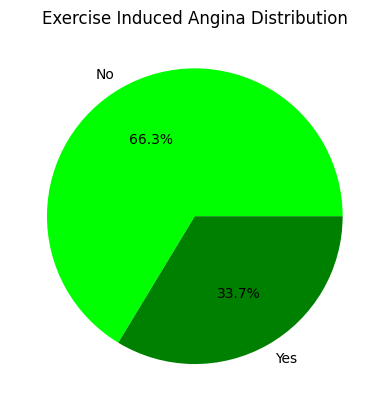

In [18]:
plt.pie(df['exang'].value_counts().sort_index(), labels=['No', 'Yes'], autopct='%1.1f%%', colors=['lime', 'green'])
plt.title('Exercise Induced Angina Distribution')
plt.show()

### Major Vessels Coloured by Flourosopy Distribution

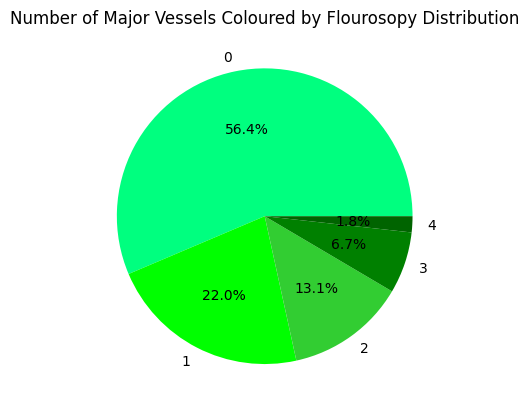

In [19]:
plt.pie(df['ca'].value_counts().sort_index(), labels=['0', '1', '2', '3', '4'], autopct='%1.1f%%', colors=['springgreen', 'lime', 'limegreen', 'green', 'darkgreen'])
plt.title('Number of Major Vessels Coloured by Flourosopy Distribution')
plt.show()

### Heart Disease Distribution

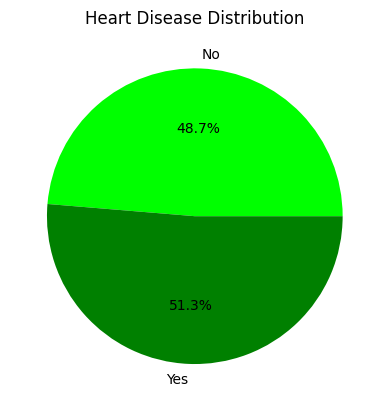

In [20]:
plt.pie(df['target'].value_counts().sort_index(), labels=['No', 'Yes'], autopct='%1.1f%%', colors=['lime', 'green'])
plt.title('Heart Disease Distribution')
plt.show()

## Features vs Target Data Analysis

### Age vs Heart Disease

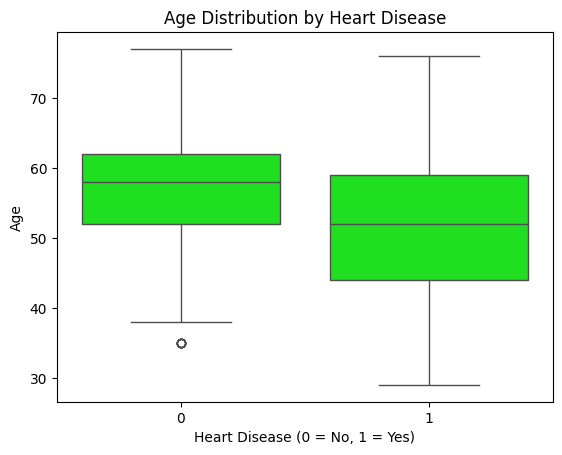

In [21]:
sns.boxplot(x='target', y='age', data=df, color='lime')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.title('Age Distribution by Heart Disease')
plt.show()

### Sex vs Heart Disease

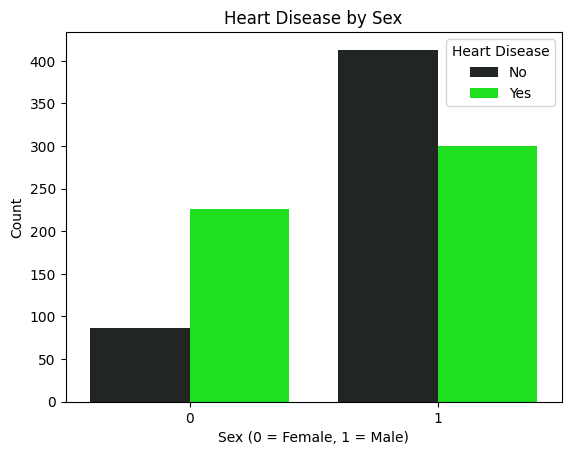

In [22]:
sns.countplot(x='sex', hue='target', data=df, palette='dark:lime')
plt.title('Heart Disease by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

### CP type vs Heart Disease

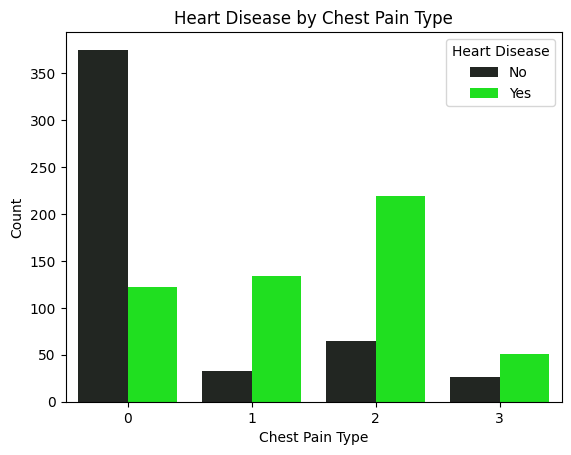

In [23]:
sns.countplot(x='cp', hue='target', data=df, palette='dark:lime')
plt.title('Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

### Rest BP vs Heart Disease

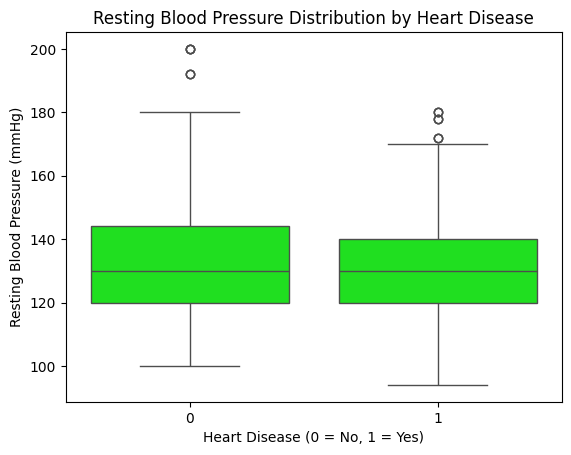

In [24]:
sns.boxplot(x='target', y='trestbps', data=df, color='lime')
plt.title('Resting Blood Pressure Distribution by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Resting Blood Pressure (mmHg)')
plt.show()

### Serum Chol vs Heart Disease

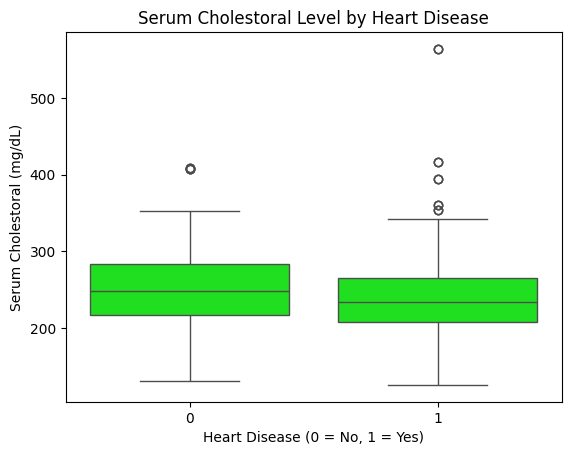

In [25]:
sns.boxplot(x='target', y='chol', data=df, color='lime')
plt.title('Serum Cholestoral Level by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Serum Cholestoral (mg/dL)')
plt.show()


### Fasting BS Level vs Heart Disease

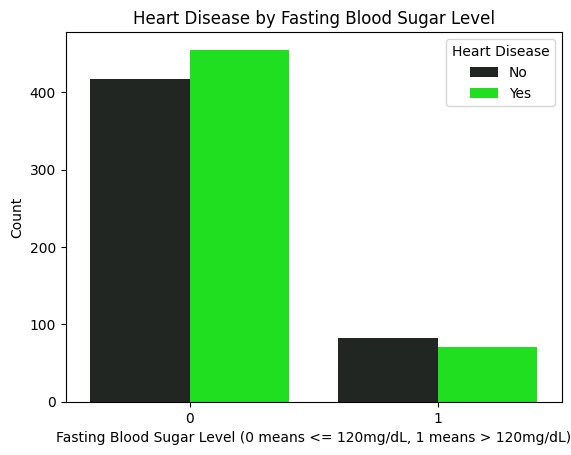

In [26]:
sns.countplot(x='fbs', hue='target', data=df, palette='dark:lime')
plt.title('Heart Disease by Fasting Blood Sugar Level')
plt.xlabel('Fasting Blood Sugar Level (0 means <= 120mg/dL, 1 means > 120mg/dL)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

### Max HR vs Heart Disease

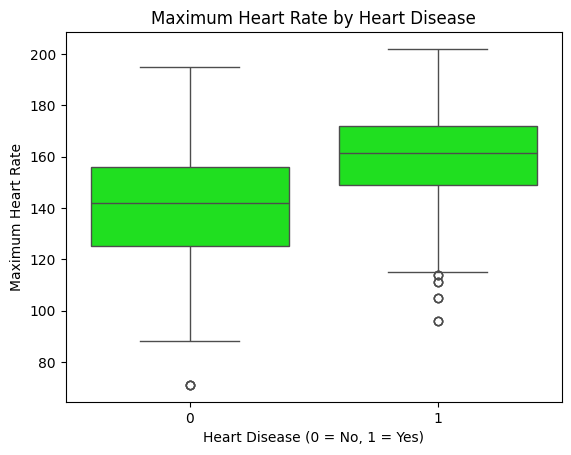

In [27]:
sns.boxplot(x='target', y='thalach', data=df, color='lime')
plt.title('Maximum Heart Rate by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Maximum Heart Rate')
plt.show()

### EIA vs Heart Disease

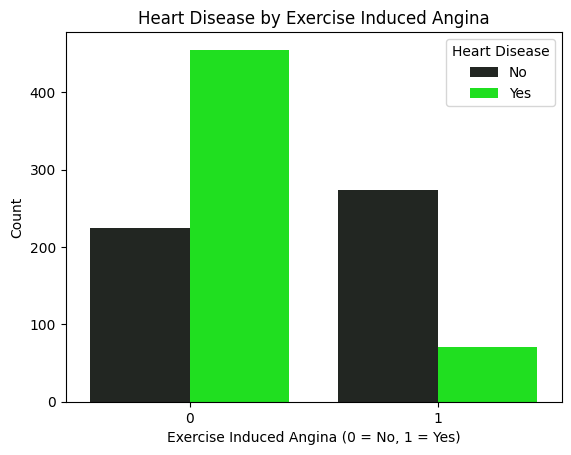

In [28]:
sns.countplot(x='exang', hue='target', data=df, palette='dark:lime')
plt.title('Heart Disease by Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

# Correlation Matrix

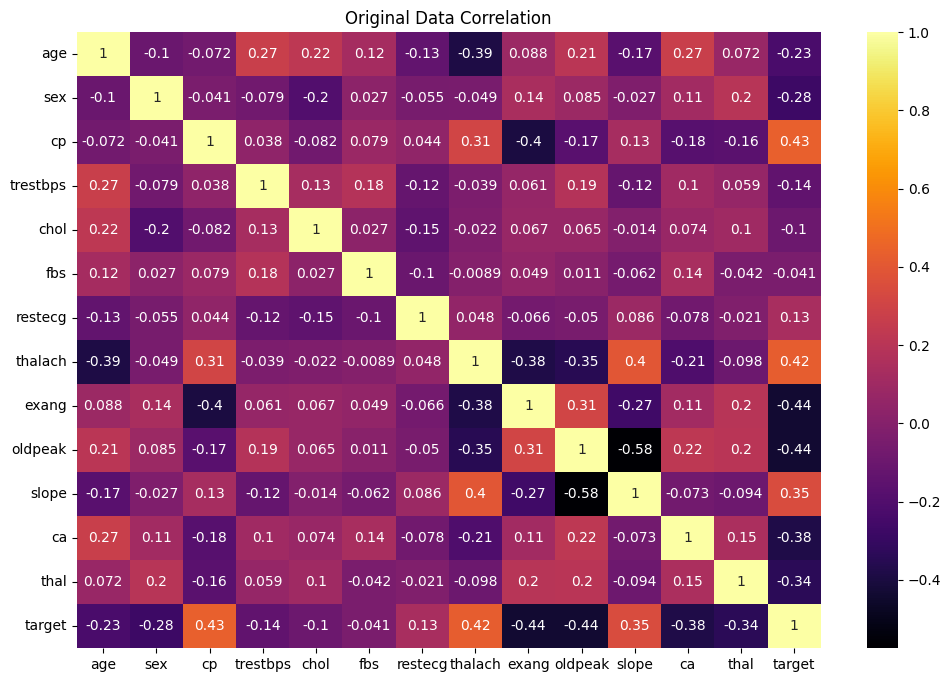

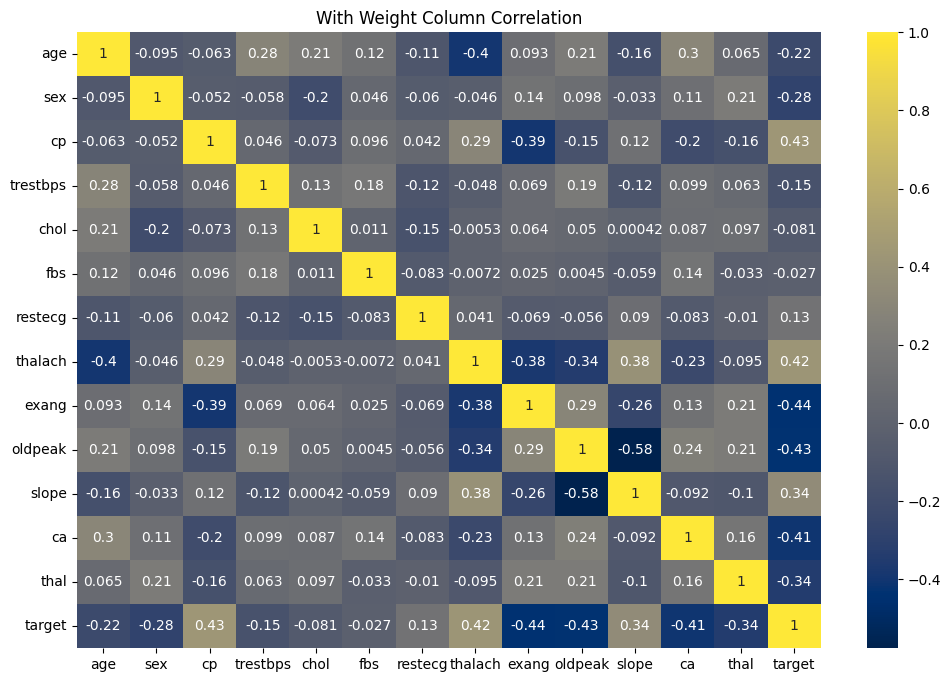

In [29]:
corr_normal = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_normal, annot=True, cmap="inferno")
plt.title("Original Data Correlation")
plt.show()

corr_with_weight = df.drop_duplicates().corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_with_weight, annot=True, cmap="cividis")
plt.title("With Weight Column Correlation")
plt.show()

# Summary

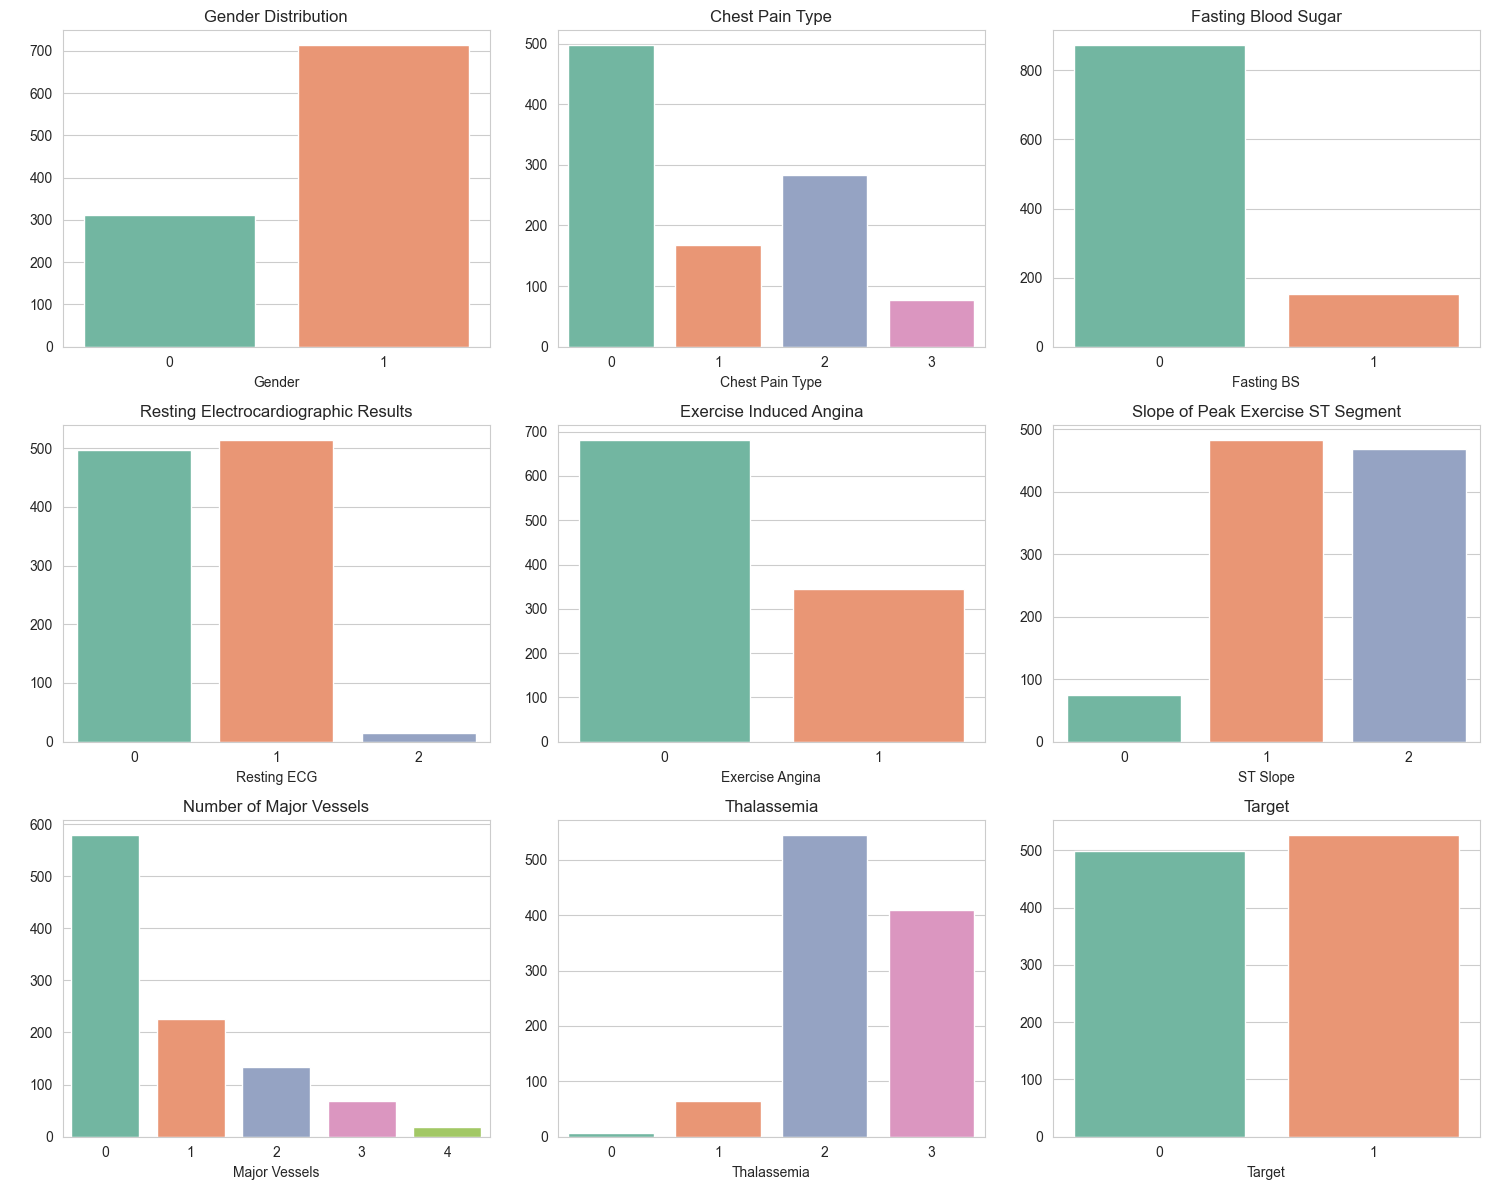

In [30]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(3, 3, figsize=(15, 12)) 

def count_plot(column, data_frame, cor, title, label):
    sns.countplot(x=column, hue=column, data=data_frame, palette='Set2', ax=axes[cor[0], cor[1]], legend=False)
    axes[cor[0], cor[1]].set_title(title)
    axes[cor[0], cor[1]].set_xlabel(label)
    axes[cor[0], cor[1]].set_ylabel(' ')

columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal" , "target"]
titles = ["Gender Distribution", "Chest Pain Type", "Fasting Blood Sugar", "Resting Electrocardiographic Results",
          "Exercise Induced Angina", "Slope of Peak Exercise ST Segment", "Number of Major Vessels",
          "Thalassemia" , 'Target']
labels = ["Gender", "Chest Pain Type", "Fasting BS", "Resting ECG", "Exercise Angina", "ST Slope", "Major Vessels", "Thalassemia" , "Target"]

for i, column in enumerate(columns):
    count_plot(column, df, (i//3, i%3), titles[i], labels[i])

plt.tight_layout()

plt.show()


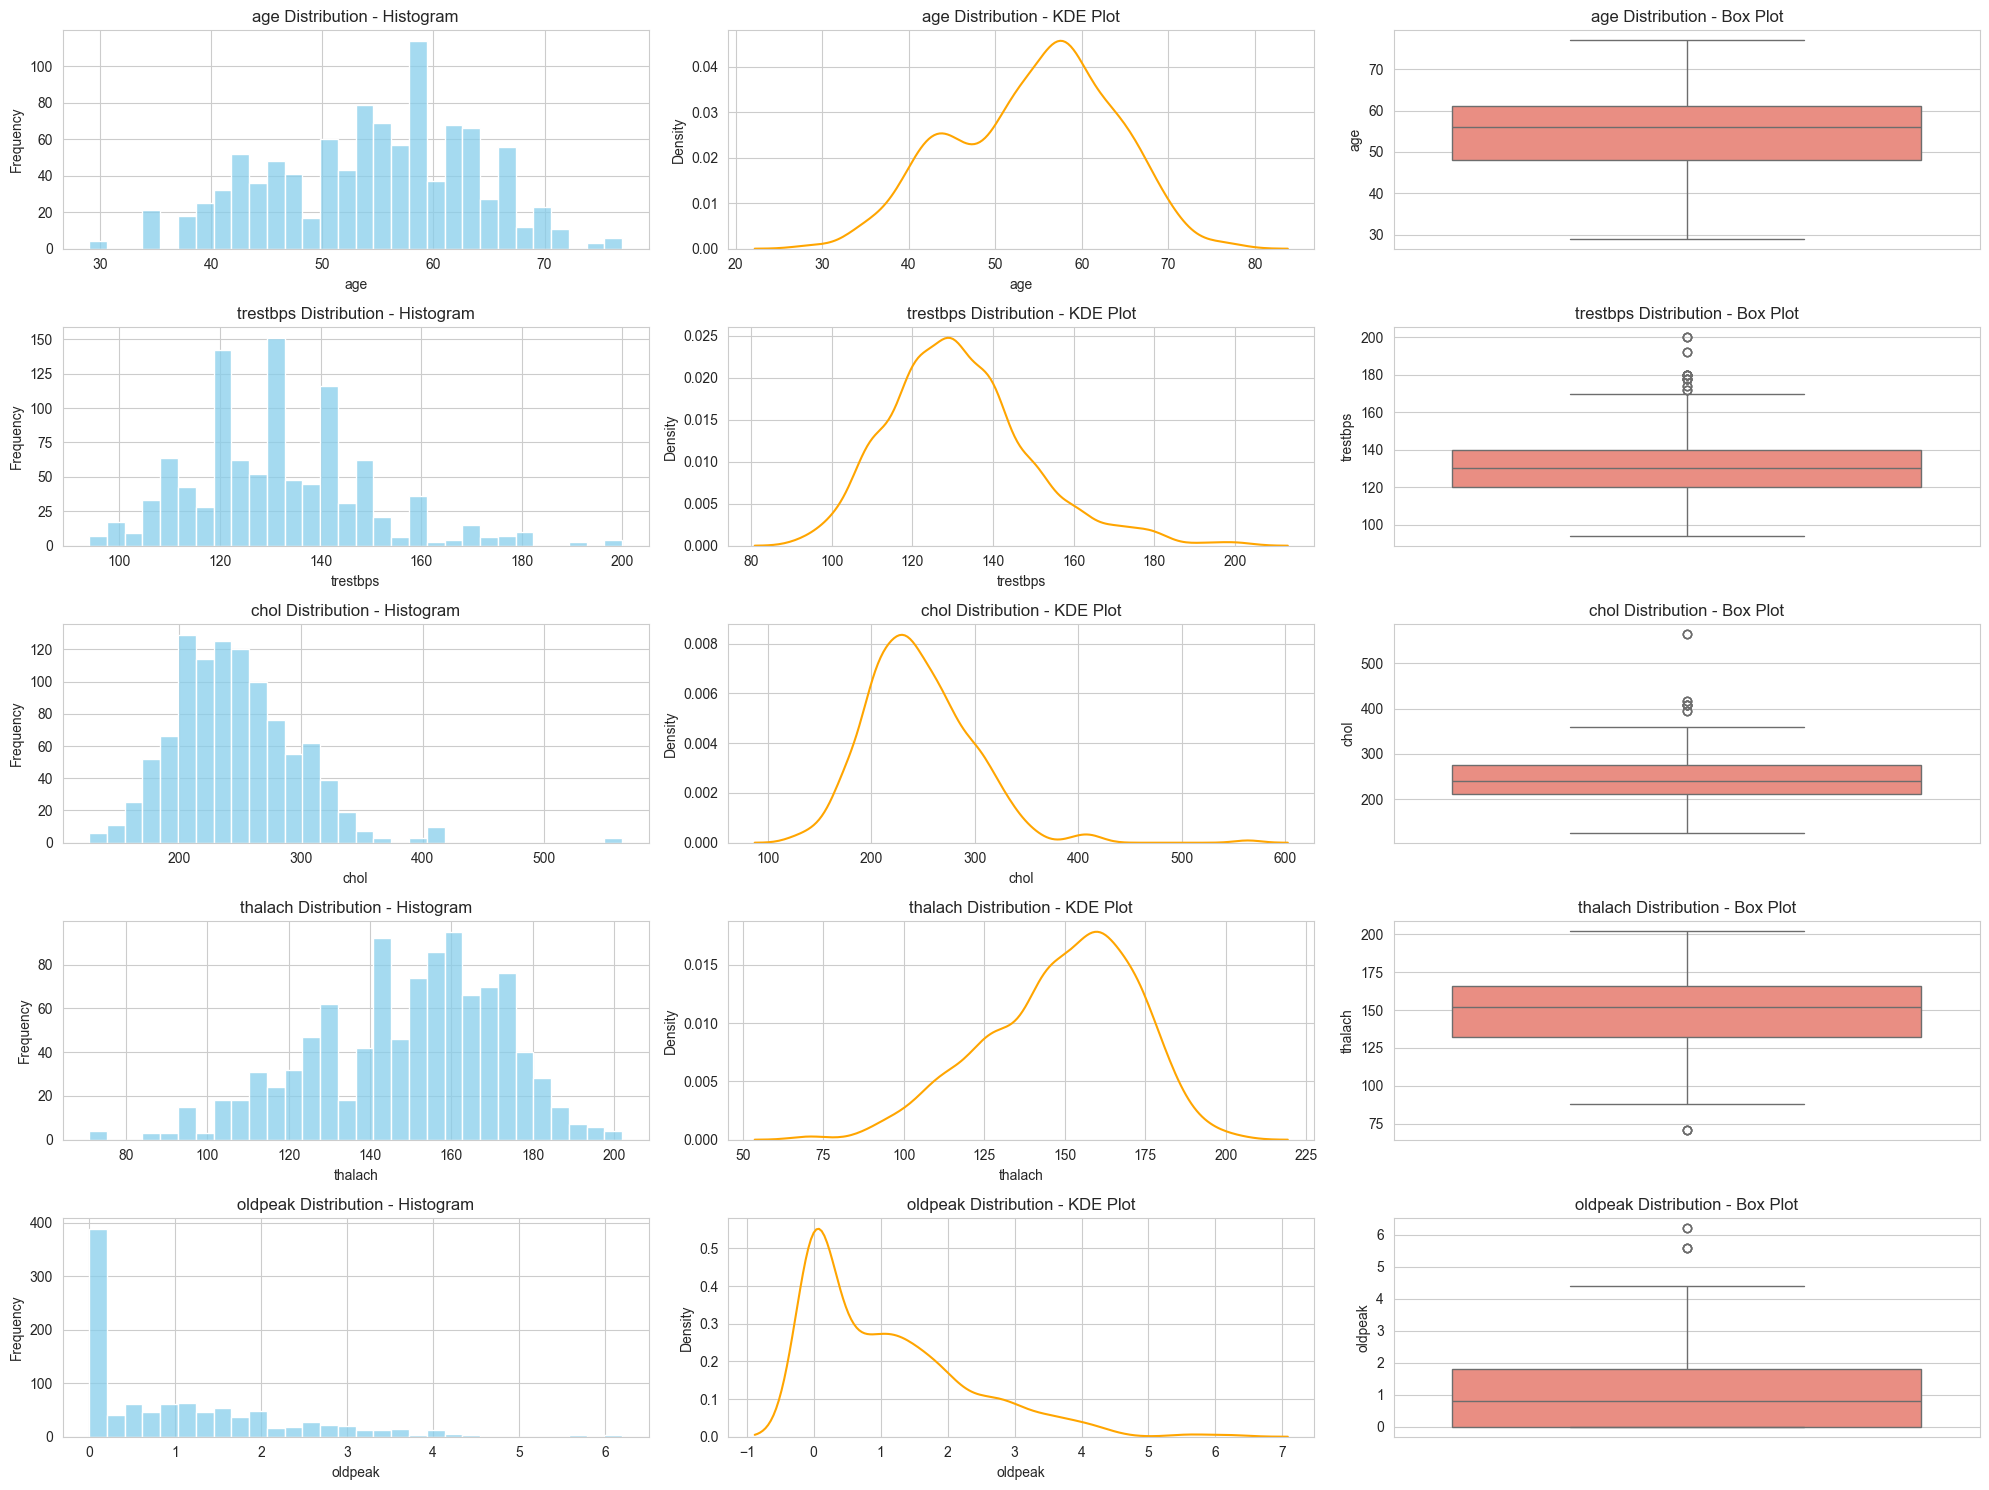

In [31]:
sns.set_style("whitegrid")

numeric_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]

fig, axes = plt.subplots(5, 3, figsize=(20, 15))

def plot_distribution(column, data_frame, cor, title, label):

    sns.histplot(data_frame[column], kde=False, ax=axes[cor[0], 0], color='skyblue', bins=30)
    axes[cor[0], 0].set_title(f'{title} - Histogram')
    axes[cor[0], 0].set_xlabel(label)
    axes[cor[0], 0].set_ylabel('Frequency')
    
    sns.kdeplot(data=data_frame[column], ax=axes[cor[0], 1], color='orange')
    axes[cor[0], 1].set_title(f'{title} - KDE Plot')

    sns.boxplot(y=data_frame[column], ax=axes[cor[0], 2], color='salmon')
    axes[cor[0], 2].set_title(f'{title} - Box Plot')

for i, column in enumerate(numeric_columns):
    plot_distribution(column, df, (i, 0), f'{column} Distribution', column)

plt.tight_layout()

plt.show()

# Splitting Data and Feature Scaling

In [32]:
X = df.drop(columns = "target", axis=1)
y= df["target"]

In [33]:
print(X.shape)
print(y.shape)

(1025, 13)
(1025,)


## Splitting Data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [35]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1025, 13)
(820, 13)
(205, 13)


In [36]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(1025,)
(820,)
(205,)


#### Splitted-Data Processing

In [37]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modelling

#### Random Forest Classifier

Accuracy on Training data:  100.0
Accuracy on Test data:  100.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



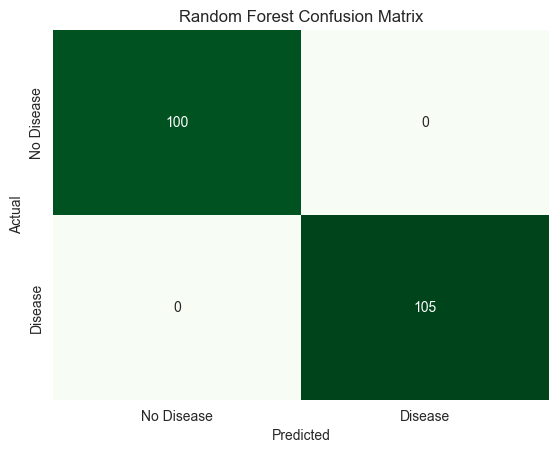

In [38]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

X_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)

X_test_prediction = rf.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy*100)


print("Classification Report: \n", classification_report(y_test, X_test_prediction))

rf_matrix = confusion_matrix(y_test, X_test_prediction)
sns.heatmap(rf_matrix, annot=True, fmt='g', cmap='Greens', cbar=False, xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()